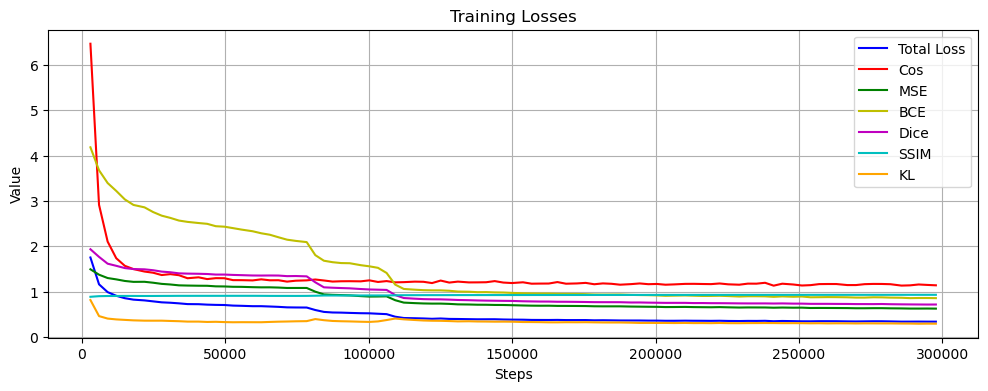

In [7]:
import re
import matplotlib.pyplot as plt

# read log file
file_path = './train_losses_log.log'
with open(file_path, 'r') as file:
    log_content = file.readlines()

# define the pattern to extract the loss data
full_pattern = re.compile(
    r"epoch\s+(\d+)\s+steps\s+(\d+):\{'total_loss':\s+([\d\.]+),\s+'cos':\s+([\d\.]+),\s+'mse':\s+([\d\.]+),\s+'bce':\s+([\d\.]+),\s+'dice':\s+([\d\.]+),\s+'ssim':\s+([\d\.]+),\s+'kl':\s+([\d\.]+)"
)

# initialize lists
steps = []
total_losses = []
cos_losses = []
mse_losses = []
bce_losses = []
dice_losses = []
ssim_losses = []
kl_losses = []

# get the loss data
for line in log_content:
    match = full_pattern.search(line)
    if match:
        step = int(match.group(2))
        total_loss = float(match.group(3))
        cos = float(match.group(4))
        mse = float(match.group(5))
        bce = float(match.group(6))
        dice = float(match.group(7))
        ssim = float(match.group(8))
        kl = float(match.group(9))
        
        steps.append(step)
        total_losses.append(total_loss)
        cos_losses.append(cos)
        mse_losses.append(mse)
        bce_losses.append(bce)
        dice_losses.append(dice)
        ssim_losses.append(ssim)
        kl_losses.append(kl)

# plot the loss data
plt.figure(figsize=(12, 4))
plt.plot(steps, total_losses, label='Total Loss', color='b')
plt.plot(steps, cos_losses, label='Cos', color='r')
plt.plot(steps, mse_losses, label='MSE', color='g')
plt.plot(steps, bce_losses, label='BCE', color='y')
plt.plot(steps, dice_losses, label='Dice', color='m')
plt.plot(steps, ssim_losses, label='SSIM', color='c')
plt.plot(steps, kl_losses, label='KL', color='orange')
# add labels and title
plt.xlabel('Steps')
plt.ylabel('Value')
plt.title('Training Losses')
plt.legend()
plt.grid(True)

# save the plot 
plt.savefig('train_losses.png', dpi=300)

plt.show()

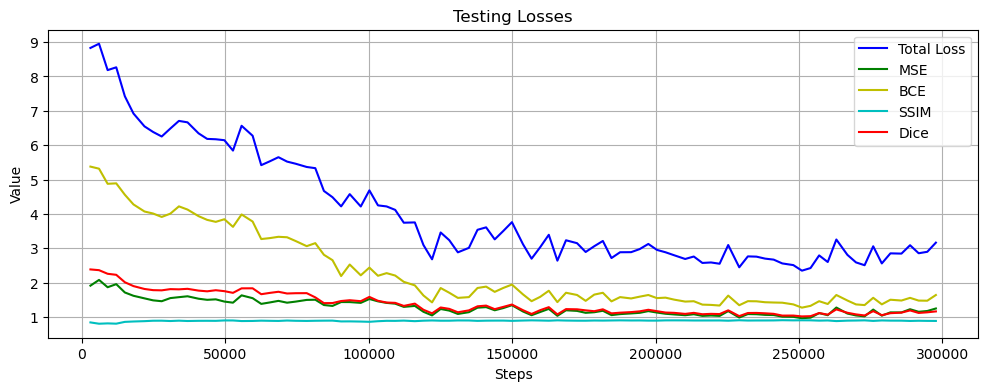

In [8]:
# read log file
file_path = './test_losses_log.log'
with open(file_path, 'r') as file:
    log_content = file.readlines()

# define the pattern to extract the loss data
full_pattern = re.compile(
    r"epoch\s+(\d+)\s+steps\s+(\d+):\{'total_loss':\s+([\d\.]+),\s+'mse':\s+([\d\.]+),\s+'bce':\s+([\d\.]+),\s+'ssim':\s+([\d\.]+),\s+'dice':\s+([\d\.]+)"
)

# initialize lists
steps = []
total_losses = []
cos_losses = []
mse_losses = []
bce_losses = []
dice_losses = []
ssim_losses = []
kl_losses = []

# get the loss data
for line in log_content:
    match = full_pattern.search(line)
    if match:
        step = int(match.group(2))
        total_loss = float(match.group(3))
        mse = float(match.group(4))
        bce = float(match.group(5))
        ssim = float(match.group(6))
        dice = float(match.group(7)) 

        steps.append(step)
        total_losses.append(total_loss)
        mse_losses.append(mse)
        bce_losses.append(bce)
        ssim_losses.append(ssim)
        dice_losses.append(dice)

# plot the loss data
plt.figure(figsize=(12, 4))
plt.plot(steps, total_losses, label='Total Loss', color='b')
plt.plot(steps, mse_losses, label='MSE', color='g')
plt.plot(steps, bce_losses, label='BCE', color='y')
plt.plot(steps, ssim_losses, label='SSIM', color='c')
plt.plot(steps, dice_losses, label='Dice', color='r')
# add labels and title
plt.xlabel('Steps')
plt.ylabel('Value')
plt.title('Testing Losses')
plt.legend()
plt.grid(True)

# save the plot 
plt.savefig('test_losses.png', dpi=300)

plt.show()

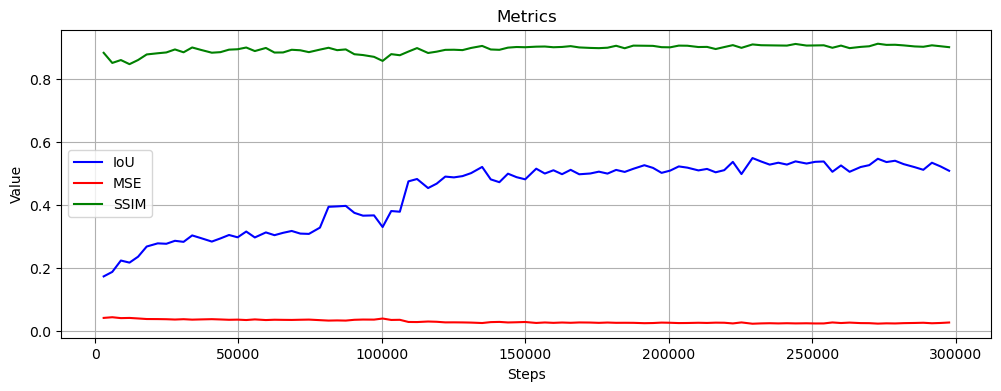

In [9]:
# read log file
file_path = './metrics_log.log'
with open(file_path, 'r') as file:
    log_content = file.readlines()

# define the pattern to extract the loss data
full_pattern = re.compile(
    r"epoch\s+(\d+)\s+steps\s+(\d+):\{'IoU':\s+([\d\.]+),\s+'mse':\s+([\d\.]+),\s+'ssim':\s+([\d\.]+)"
)

# initialize lists
steps = []
IoU_losses = []
mse_losses = []
ssim_losses = []


# get the loss data
for line in log_content:
    match = full_pattern.search(line)
    if match:
        step = int(match.group(2))
        IoU = float(match.group(3))
        mse = float(match.group(4))
        ssim = float(match.group(5))
  

        steps.append(step)
        IoU_losses.append(IoU)
        mse_losses.append(mse)
        ssim_losses.append(ssim)


plt.figure(figsize=(12, 4))
plt.plot(steps, IoU_losses, label='IoU', color='b')
plt.plot(steps, mse_losses, label='MSE', color='r')
plt.plot(steps, ssim_losses, label='SSIM', color='g')
# add labels and title
plt.xlabel('Steps')
plt.ylabel('Value')
plt.title('Metrics')
plt.legend()
plt.grid(True)

# save the plot    
plt.savefig('metrics.png', dpi=300)

plt.show()

In [10]:
from PIL import Image

# combine three images
img1 = Image.open('train_losses.png')
img2 = Image.open('test_losses.png')
img3 = Image.open('metrics.png')

# define the width and height of the images
width, height = img1.size

total_height = height * 3  

new_img = Image.new('RGB', (width, total_height))

# add three images to the new image
new_img.paste(img1, (0, 0))            
new_img.paste(img2, (0, height))       
new_img.paste(img3, (0, height * 2))    

# save the combined image
new_img.save('A3_313831006_顏貝羽.png')